In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as numpy
df = pd.read_csv('SBAnational.csv')

df.head(5)


/tmp/ipykernel_7757/4237066746.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/tmp/ipykernel_7757/4237066746.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SBAnational.csv')


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [2]:
df.shape

(899164, 27)

In [3]:
df['BalanceGross'].unique()

array(['$0.00 ', '$12,750.00 ', '$827,875.00 ', '$25,000.00 ',
       '$37,100.00 ', '$43,127.00 ', '$84,617.00 ', '$1,760.00 ',
       '$115,820.00 ', '$996,262.00 ', '$395,476.00 ', '$41,509.00 ',
       '$600.00 ', '$9,111.00 ', '$96,908.00 '], dtype=object)

In [4]:
# 1 useless 5
# 2 non
# city et state oui 
# je sais pas bank name, fiscal year of com
# 1 2 6 10 7 15 16 17 21 22 25 26

#c

In [5]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [6]:
df = df.drop(['LoanNr_ChkDgt','Name','City','Bank', 'ApprovalDate','ChgOffDate','DisbursementDate', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr' 	], axis=1)

In [7]:
df.columns

Index(['State', 'Zip', 'BankState', 'NAICS', 'ApprovalFY', 'Term', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'MIS_Status', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [8]:


df.isna().sum()

State              14
Zip                 0
BankState        1566
NAICS               0
ApprovalFY          0
Term                0
NoEmp               0
NewExist          136
CreateJob           0
RetainedJob         0
FranchiseCode       0
UrbanRural          0
RevLineCr        4528
LowDoc           2582
MIS_Status       1997
GrAppv              0
SBA_Appv            0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isna().sum()

State            0
Zip              0
BankState        0
NAICS            0
ApprovalFY       0
Term             0
NoEmp            0
NewExist         0
CreateJob        0
RetainedJob      0
FranchiseCode    0
UrbanRural       0
RevLineCr        0
LowDoc           0
MIS_Status       0
GrAppv           0
SBA_Appv         0
dtype: int64

In [11]:
df.shape


(888421, 17)

In [12]:
df.duplicated().sum()


484

In [13]:
df = df.drop_duplicates()
df.shape

(887937, 17)

In [14]:
df.head()

,State,Zip,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,IN,47711,OH,451120,1997,84,4,2.0,0,0,1,0,N,Y,P I F,"$60,000.00","$48,000.00"
1,IN,46526,IN,722410,1997,60,2,2.0,0,0,1,0,N,Y,P I F,"$40,000.00","$32,000.00"
2,IN,47401,IN,621210,1997,180,7,1.0,0,0,1,0,N,N,P I F,"$287,000.00","$215,250.00"
3,OK,74012,OK,0,1997,60,2,1.0,0,0,1,0,N,Y,P I F,"$35,000.00","$28,000.00"
4,FL,32801,FL,0,1997,240,14,1.0,7,7,1,0,N,N,P I F,"$229,000.00","$229,000.00"


In [15]:
#enlever les lignes ou le naics est à 0
nombre_zeros_naics = (df['NAICS'] == 0).sum()
nombre_zeros_naics

198492

In [16]:
#enlever les lignes ou le naics est à 0
#df = df[df['NAICS'] != 0]

In [17]:
df.shape

(887937, 17)

In [18]:
df.dtypes

State             object
Zip                int64
BankState         object
NAICS              int64
ApprovalFY        object
Term               int64
NoEmp              int64
NewExist         float64
CreateJob          int64
RetainedJob        int64
FranchiseCode      int64
UrbanRural         int64
RevLineCr         object
LowDoc            object
MIS_Status        object
GrAppv            object
SBA_Appv          object
dtype: object

In [19]:
#replace dollar et convertir en float
df['GrAppv'] = df['GrAppv'].replace('[\$,]', '', regex=True).astype(float)
df['SBA_Appv'] = df['SBA_Appv'].replace('[\$,]', '', regex=True).astype(float)

In [20]:
df.to_csv('dataset_test.csv', index=False)
df.head()

,State,Zip,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,IN,47711,OH,451120,1997,84,4,2.0,0,0,1,0,N,Y,P I F,60000.0,48000.0
1,IN,46526,IN,722410,1997,60,2,2.0,0,0,1,0,N,Y,P I F,40000.0,32000.0
2,IN,47401,IN,621210,1997,180,7,1.0,0,0,1,0,N,N,P I F,287000.0,215250.0
3,OK,74012,OK,0,1997,60,2,1.0,0,0,1,0,N,Y,P I F,35000.0,28000.0
4,FL,32801,FL,0,1997,240,14,1.0,7,7,1,0,N,N,P I F,229000.0,229000.0


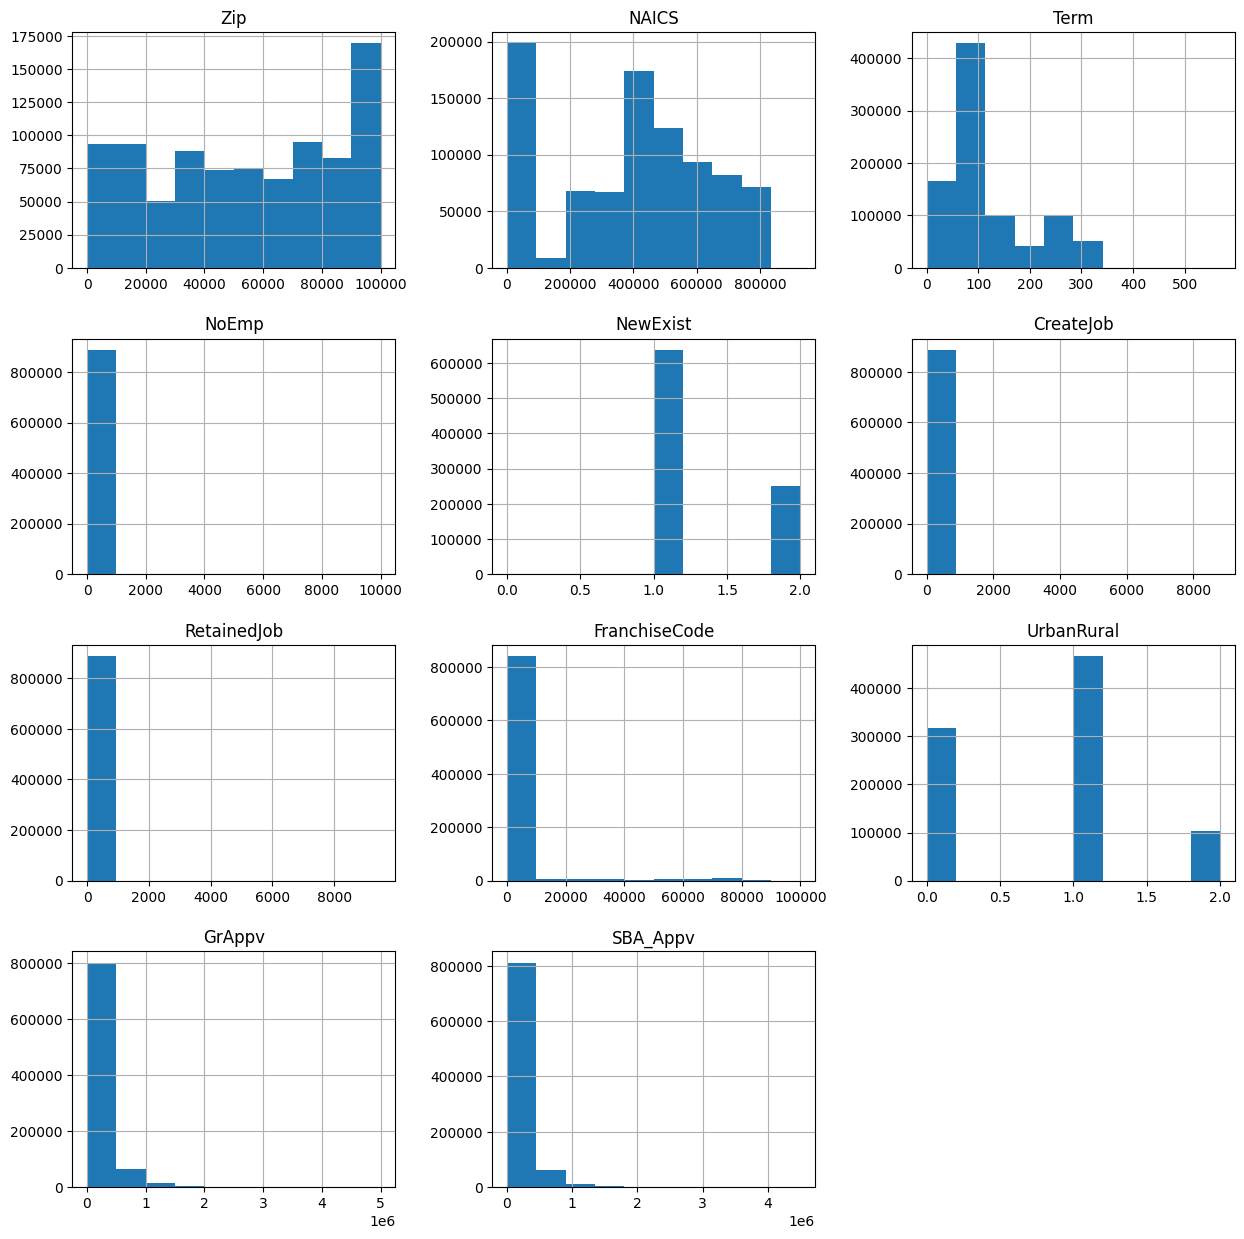

In [21]:
df.hist(figsize = (15,15));

In [22]:
#target proportion 
df['MIS_Status'].value_counts()


MIS_Status
P I F     731588
CHGOFF    156349
Name: count, dtype: int64

<Axes: >

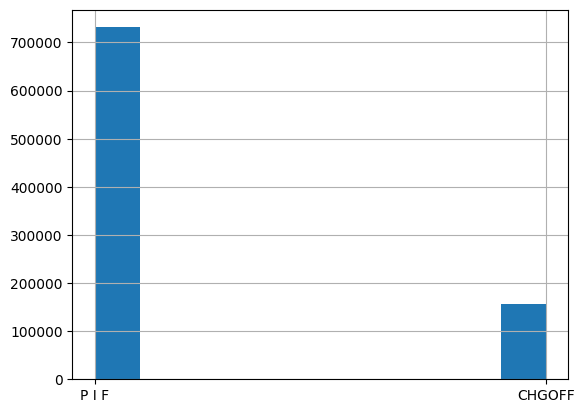

In [23]:
df['MIS_Status'].hist()

In [24]:
df.head()

,State,Zip,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,IN,47711,OH,451120,1997,84,4,2.0,0,0,1,0,N,Y,P I F,60000.0,48000.0
1,IN,46526,IN,722410,1997,60,2,2.0,0,0,1,0,N,Y,P I F,40000.0,32000.0
2,IN,47401,IN,621210,1997,180,7,1.0,0,0,1,0,N,N,P I F,287000.0,215250.0
3,OK,74012,OK,0,1997,60,2,1.0,0,0,1,0,N,Y,P I F,35000.0,28000.0
4,FL,32801,FL,0,1997,240,14,1.0,7,7,1,0,N,N,P I F,229000.0,229000.0


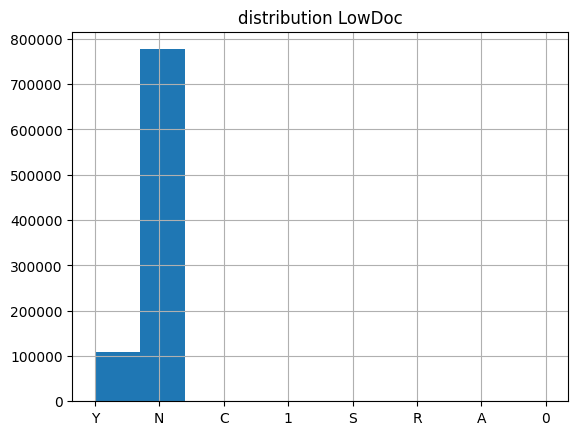

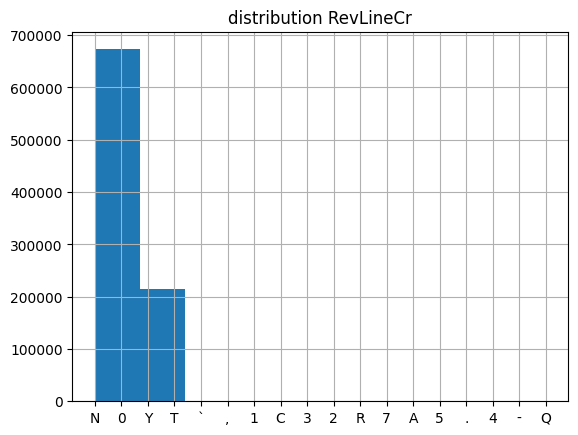

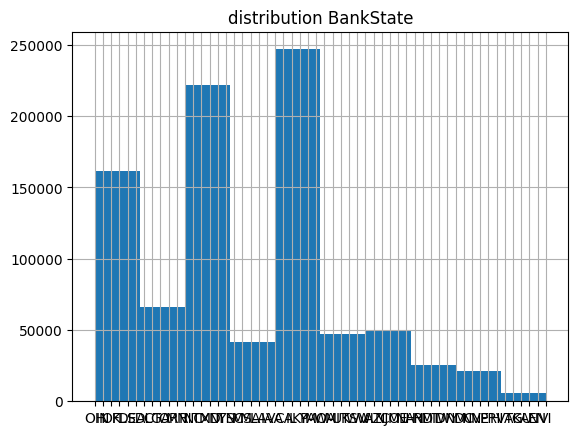

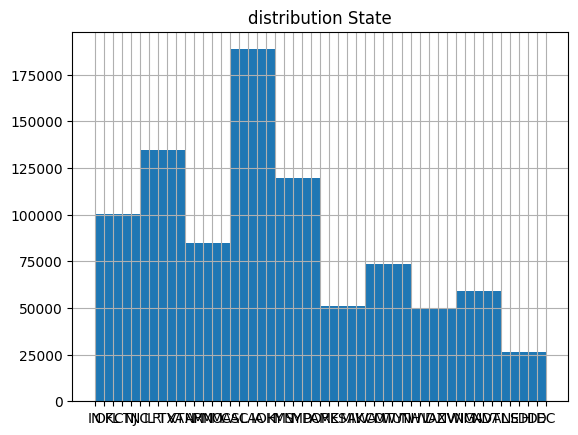

In [25]:
cat_col = ['LowDoc', 'RevLineCr', 'BankState', 'State']

for col in cat_col:
    df[col].hist()
    plt.title(f'distribution {col}')
    plt.show()

Zip                 Axes(0.125,0.712609;0.227941x0.167391)
NAICS            Axes(0.398529,0.712609;0.227941x0.167391)
Term             Axes(0.672059,0.712609;0.227941x0.167391)
NoEmp               Axes(0.125,0.511739;0.227941x0.167391)
NewExist         Axes(0.398529,0.511739;0.227941x0.167391)
CreateJob        Axes(0.672059,0.511739;0.227941x0.167391)
RetainedJob          Axes(0.125,0.31087;0.227941x0.167391)
FranchiseCode     Axes(0.398529,0.31087;0.227941x0.167391)
UrbanRural        Axes(0.672059,0.31087;0.227941x0.167391)
GrAppv                  Axes(0.125,0.11;0.227941x0.167391)
SBA_Appv             Axes(0.398529,0.11;0.227941x0.167391)
dtype: object

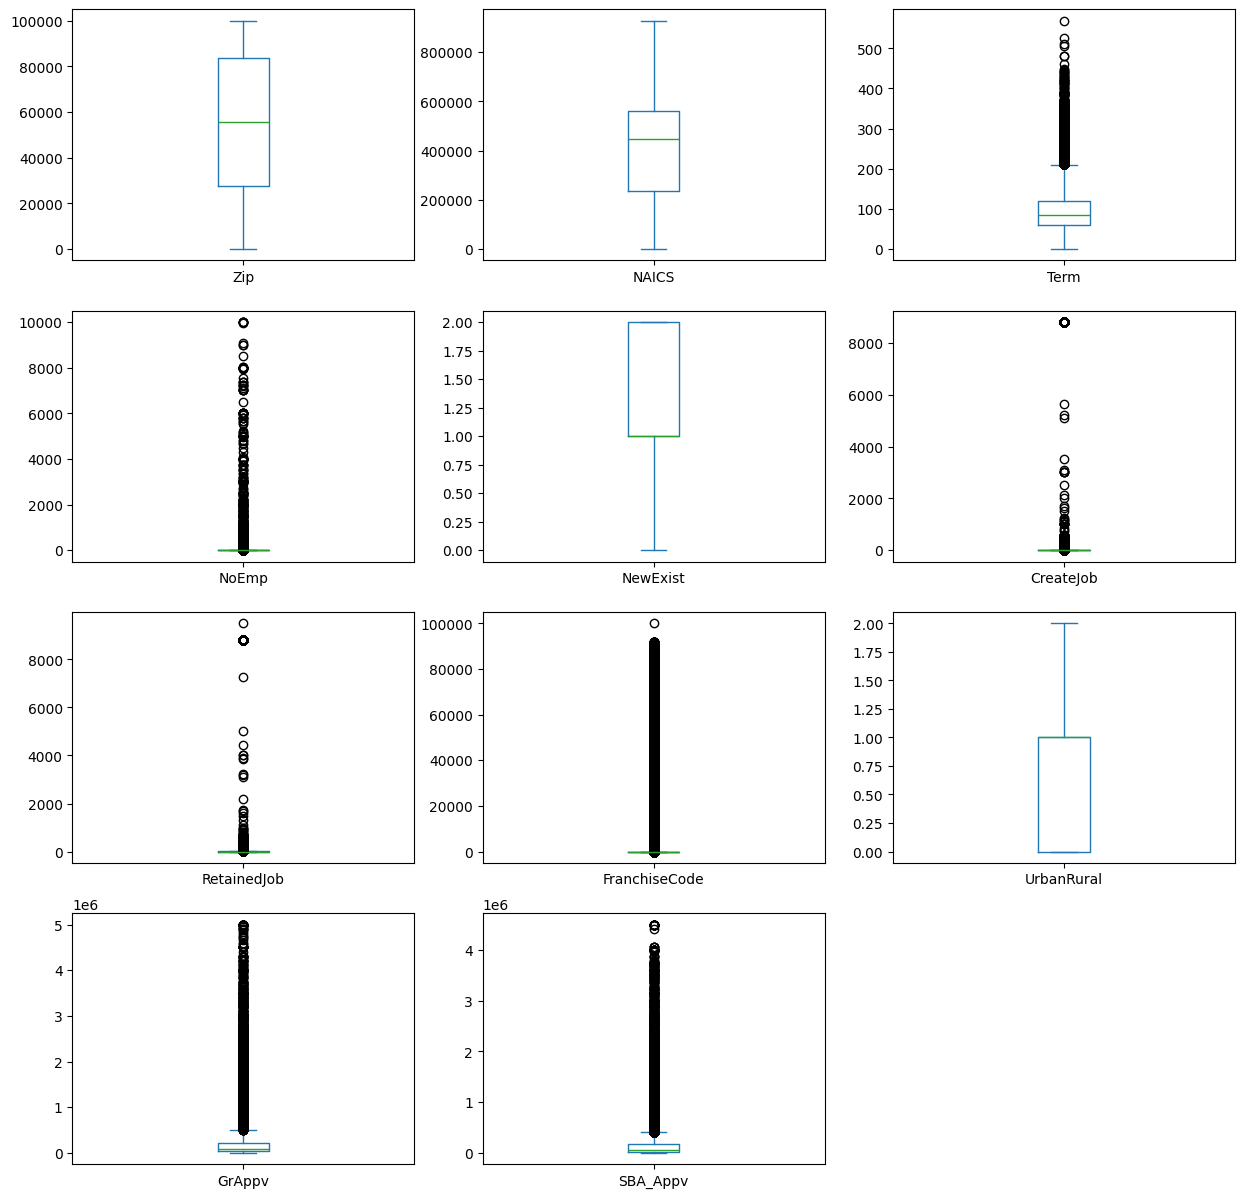

In [26]:
df.plot(kind='box',
          subplots=True,
          layout=(4,3),
          sharex= False, #share x -> le meme x donc le desactiver
          figsize = (15,15) #regler la taille des plots
          )

In [27]:
cat_col = ['LowDoc', 'RevLineCr', 'BankState', 'State']

for col in cat_col:
    print(df[col].value_counts())
    

LowDoc
N    776896
Y    107876
0      1236
C       757
S       602
A       495
R        74
1         1
Name: count, dtype: int64
RevLineCr
N    415633
0    257318
Y    199739
T     15182
1        23
R        14
`        11
2         6
C         2
3         1
,         1
7         1
A         1
5         1
.         1
4         1
-         1
Q         1
Name: count, dtype: int64
BankState
CA    116865
NC     78988
IL     65351
OH     58055
SD     50708
TX     47282
RI     44004
NY     39255
VA     28805
DE     24413
MN     19789
UT     18869
PA     16904
WI     15256
MO     14684
MA     13665
FL     13658
GA     13643
AL     11988
OR     11175
WA     10569
CO     10456
CT      9823
IA      9735
NJ      9355
KS      8754
MT      7745
IN      7532
SC      7426
MI      7286
OK      7240
MD      6930
NH      6706
AR      6223
MS      5847
TN      5554
NE      5271
ND      5054
LA      5011
VT      4693
NM      4348
KY      4310
NV      4305
ID      4261
DC      3963
AZ      3913
ME      364

In [28]:
df2 = df.copy()


df2.head()


,State,Zip,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,IN,47711,OH,451120,1997,84,4,2.0,0,0,1,0,N,Y,P I F,60000.0,48000.0
1,IN,46526,IN,722410,1997,60,2,2.0,0,0,1,0,N,Y,P I F,40000.0,32000.0
2,IN,47401,IN,621210,1997,180,7,1.0,0,0,1,0,N,N,P I F,287000.0,215250.0
3,OK,74012,OK,0,1997,60,2,1.0,0,0,1,0,N,Y,P I F,35000.0,28000.0
4,FL,32801,FL,0,1997,240,14,1.0,7,7,1,0,N,N,P I F,229000.0,229000.0


In [29]:
#enlever les lignes ou le naics est à 0
df2 = df2[df2['NAICS'] != 0]

df2 = df2[df2['NewExist'] != 0]

df2 = df2[df2['Zip'] != 0]




In [30]:
df2['NewExist'].unique()

array([2., 1.])

In [31]:
df2['RevLineCr'].unique()

array(['N', 'Y', '0', 'T', '`', ',', '1', 'C', '2', 'R', '7', 'A', '-',
       'Q'], dtype=object)

In [32]:
df2['RevLineCr'].value_counts()

RevLineCr
N    266565
0    213913
Y    193518
T     14553
1        14
R        14
`         5
2         5
C         2
,         1
7         1
A         1
-         1
Q         1
Name: count, dtype: int64

In [33]:
df2['LowDoc'].unique()

array(['Y', 'N', 'C', '1', 'S', 'R', 'A', '0'], dtype=object)

In [34]:
df2['LowDoc'].value_counts()

LowDoc
N    620139
Y     66118
C       615
S       602
0       550
A       495
R        74
1         1
Name: count, dtype: int64

In [35]:
valeur_enlever = ['`', ',', '1', 'C', '2', 'R', '7', 'A', '-', 'Q']

for col in valeur_enlever:
    df2 = df2[df2['RevLineCr'] != col] 



In [36]:
df2['RevLineCr'].value_counts()

RevLineCr
N    266565
0    213913
Y    193518
T     14553
Name: count, dtype: int64

In [37]:
import numpy as np
df2['RevLineCr'] = df2['RevLineCr'].replace('T', np.nan)
df2['RevLineCr'] = df2['RevLineCr'].replace('0', np.nan)

In [38]:
df2['RevLineCr'].unique()

array(['N', 'Y', nan], dtype=object)

In [39]:
df2['LowDoc'].value_counts()

LowDoc
N    620105
Y     66107
C       615
S       602
0       550
A       495
R        74
1         1
Name: count, dtype: int64

In [40]:
valeur_enlever = ['C', '1', 'S', 'R', 'A', '0']

for col in valeur_enlever:
    df2 = df2[df2['LowDoc'] != col] 

In [41]:
df2['LowDoc'].unique()

array(['Y', 'N'], dtype=object)

In [42]:
df2['NewExist'].unique()

array([2., 1.])

In [43]:
nombre_zeros = (df2['Zip'] == 0).sum()
nombre_zeros

0

In [44]:
# data_cols = df2.columns

# for col in data_cols:

#     plt.scatter(x=df2['MIS_Status'], y=df2[col], alpha=0.1)
#     plt.xlabel('MIS_Status')
#     plt.ylabel(col)
#     plt.title(f'MIS_Status vs {col}')
#     plt.show()

In [45]:
df2.shape

(686212, 17)

In [46]:
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#anova target et naics
f_value, p_value = stats.f_oneway(*[df2[df2['MIS_Status'] == val]['NAICS'] for val in df['MIS_Status'].unique()])

print('F-value:', f_value)
print('P-value:', p_value)

F-value: 1.2248141868950577
P-value: 0.2684183186543492


In [47]:
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#ANOVA target et NAICS
f_value, p_value = stats.f_oneway(*[df[df['MIS_Status'] == region]['NAICS'] for region in df['MIS_Status'].unique()])

print('F-value:', f_value)
print('P-value:', p_value)

F-value: 9886.350964071104
P-value: 0.0


In [48]:
from scipy.stats import chi2_contingency
#test du chi carré pour analyser les corrélations de deux features categorielles 
contingency_table = pd.crosstab(df['MIS_Status'], df['LowDoc'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

chi2, p, dof, expected, contingency_table

(6671.0257986704855,
 0.0,
 7,
 array([[2.17636346e+02, 1.76081186e-01, 8.71601870e+01, 1.33293458e+02,
         1.36796769e+05, 1.30300078e+01, 1.06000874e+02, 1.89949340e+04],
        [1.01836365e+03, 8.23918814e-01, 4.07839813e+02, 6.23706542e+02,
         6.40099231e+05, 6.09699922e+01, 4.95999126e+02, 8.88810660e+04]]),
 LowDoc         0  1    A    C       N   R    S      Y
 MIS_Status                                           
 CHGOFF        43  0  159   75  145922  25  270   9855
 P I F       1193  1  336  682  630974  49  332  98021)

In [49]:
from scipy.stats import chi2_contingency
#test du chi carré pour analyser les corrélations de deux features categorielles 
contingency_table = pd.crosstab(df['MIS_Status'], df['RevLineCr'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

chi2, p, dof, expected, contingency_table

(19130.911485490018,
 0.0,
 17,
 array([[1.76081186e-01, 1.76081186e-01, 1.76081186e-01, 4.53088586e+04,
         4.04986728e+00, 1.05648712e+00, 1.76081186e-01, 1.76081186e-01,
         1.76081186e-01, 1.76081186e-01, 1.76081186e-01, 3.52162372e-01,
         7.31851516e+04, 1.76081186e-01, 2.46513660e+00, 2.67326456e+03,
         3.51702800e+04, 1.93689305e+00],
        [8.23918814e-01, 8.23918814e-01, 8.23918814e-01, 2.12009141e+05,
         1.89501327e+01, 4.94351288e+00, 8.23918814e-01, 8.23918814e-01,
         8.23918814e-01, 8.23918814e-01, 8.23918814e-01, 1.64783763e+00,
         3.42447848e+05, 8.23918814e-01, 1.15348634e+01, 1.25087354e+04,
         1.64568720e+05, 9.06310695e+00]]),
 RevLineCr   ,  -  .       0   1  2  3  4  5  7  A  C       N  Q   R     T  \
 MIS_Status                                                                  
 CHGOFF      0  0  0   38486   2  0  0  0  0  0  0  0   60527  0   1  6543   
 P I F       1  1  1  218832  21  6  1  1  1  1  1  2  355106  1

In [50]:
df2['MIS_Status'] = df2['MIS_Status'].replace({'P I F': 0, 'CHGOFF': 1})

df2.head()

/tmp/ipykernel_7757/3674301769.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['MIS_Status'] = df2['MIS_Status'].replace({'P I F': 0, 'CHGOFF': 1})


,State,Zip,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,IN,47711,OH,451120,1997,84,4,2.0,0,0,1,0,N,Y,0,60000.0,48000.0
1,IN,46526,IN,722410,1997,60,2,2.0,0,0,1,0,N,Y,0,40000.0,32000.0
2,IN,47401,IN,621210,1997,180,7,1.0,0,0,1,0,N,N,0,287000.0,215250.0
5,CT,6062,DE,332721,1997,120,19,1.0,0,0,1,0,N,N,0,517000.0,387750.0
7,FL,34491,AL,811118,1997,84,1,2.0,0,0,1,0,N,Y,0,45000.0,36000.0


In [51]:

df_num  = df2.select_dtypes(include=['int64', 'float64'])
# Séparer les features de la variable cible
X = df_num.drop('MIS_Status', axis = 1) #les features
Y = df_num['MIS_Status'] #la variable cible

#rescale les features pour réduire les écarts de dimensions
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler().fit(X)
X_scaled = rbs.transform(X)

#X -> pd.Series, features
#Y -> pd.Series, colonne de variables cibles
#X_scaled -> np.ndarray : matrice de features
# print(X,'\n \n \n \n \n \n',Y, '\n \n \n \n \n \n', X_scaled)




In [52]:
# from sklearn.ensemble import RandomForestClassifier

# forest = RandomForestClassifier()
# forest.fit(X_scaled, Y)

# #plus c'est élevé, plus c'est utile
# importances = forest.feature_importances_
# print(importances)
# columns = X.columns

# print('Importance des features : ')
# for score, col in zip(importances, columns):
#   print(score, ':', col)



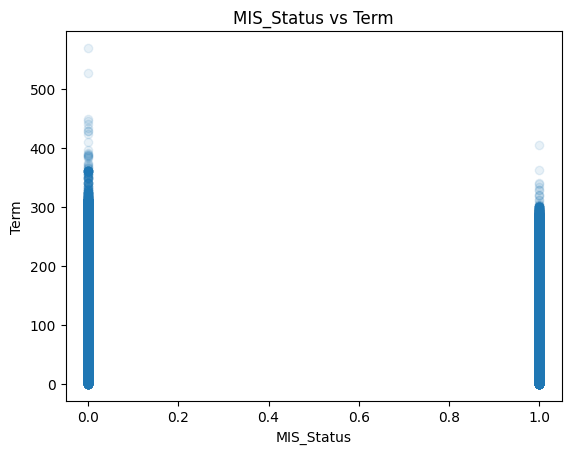

In [53]:
plt.scatter(x=df2['MIS_Status'], y=df2['Term'], alpha=0.1)
plt.xlabel('MIS_Status')
plt.ylabel('Term')
plt.title('MIS_Status vs Term')
plt.show()

In [54]:
df2.shape

df2.to_csv('dataset_test1.csv', index=False)
df2.head()

,State,Zip,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,IN,47711,OH,451120,1997,84,4,2.0,0,0,1,0,N,Y,0,60000.0,48000.0
1,IN,46526,IN,722410,1997,60,2,2.0,0,0,1,0,N,Y,0,40000.0,32000.0
2,IN,47401,IN,621210,1997,180,7,1.0,0,0,1,0,N,N,0,287000.0,215250.0
5,CT,6062,DE,332721,1997,120,19,1.0,0,0,1,0,N,N,0,517000.0,387750.0
7,FL,34491,AL,811118,1997,84,1,2.0,0,0,1,0,N,Y,0,45000.0,36000.0


In [55]:
df2.head()

,State,Zip,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,IN,47711,OH,451120,1997,84,4,2.0,0,0,1,0,N,Y,0,60000.0,48000.0
1,IN,46526,IN,722410,1997,60,2,2.0,0,0,1,0,N,Y,0,40000.0,32000.0
2,IN,47401,IN,621210,1997,180,7,1.0,0,0,1,0,N,N,0,287000.0,215250.0
5,CT,6062,DE,332721,1997,120,19,1.0,0,0,1,0,N,N,0,517000.0,387750.0
7,FL,34491,AL,811118,1997,84,1,2.0,0,0,1,0,N,Y,0,45000.0,36000.0


In [56]:


# Supposons que df est votre DataFrame contenant la colonne 'FranchiseCode'
df2['FranchiseBinary'] = df2['FranchiseCode'].apply(lambda x: 0 if x in [0, 1] else 1)
df2['FranchiseBinary'].value_counts()



FranchiseBinary
0    651746
1     34466
Name: count, dtype: int64

In [57]:
df2.head()

,State,Zip,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv,FranchiseBinary
0,IN,47711,OH,451120,1997,84,4,2.0,0,0,1,0,N,Y,0,60000.0,48000.0,0
1,IN,46526,IN,722410,1997,60,2,2.0,0,0,1,0,N,Y,0,40000.0,32000.0,0
2,IN,47401,IN,621210,1997,180,7,1.0,0,0,1,0,N,N,0,287000.0,215250.0,0
5,CT,6062,DE,332721,1997,120,19,1.0,0,0,1,0,N,N,0,517000.0,387750.0,0
7,FL,34491,AL,811118,1997,84,1,2.0,0,0,1,0,N,Y,0,45000.0,36000.0,0


In [58]:
df2.to_csv('dataset_test2.csv', index=False)
df2.head()

,State,Zip,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv,FranchiseBinary
0,IN,47711,OH,451120,1997,84,4,2.0,0,0,1,0,N,Y,0,60000.0,48000.0,0
1,IN,46526,IN,722410,1997,60,2,2.0,0,0,1,0,N,Y,0,40000.0,32000.0,0
2,IN,47401,IN,621210,1997,180,7,1.0,0,0,1,0,N,N,0,287000.0,215250.0,0
5,CT,6062,DE,332721,1997,120,19,1.0,0,0,1,0,N,N,0,517000.0,387750.0,0
7,FL,34491,AL,811118,1997,84,1,2.0,0,0,1,0,N,Y,0,45000.0,36000.0,0


In [59]:
df2.shape

(686212, 18)

In [60]:
df3 = df2.drop(['GrAppv', 'SBA_Appv'], axis =1)
df3.to_csv('dataset_test3.csv', index=False)

df3.head(15)

,State,Zip,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,FranchiseBinary
0,IN,47711,OH,451120,1997,84,4,2.0,0,0,1,0,N,Y,0,0
1,IN,46526,IN,722410,1997,60,2,2.0,0,0,1,0,N,Y,0,0
2,IN,47401,IN,621210,1997,180,7,1.0,0,0,1,0,N,N,0,0
5,CT,6062,DE,332721,1997,120,19,1.0,0,0,1,0,N,N,0,0
7,FL,34491,AL,811118,1997,84,1,2.0,0,0,1,0,N,Y,0,0
8,FL,32456,FL,721310,1997,297,2,2.0,0,0,1,0,N,N,0,0
10,NC,28256,GA,811111,1997,84,1,2.0,0,0,1,0,N,Y,0,0
11,IL,60605,OR,235950,1997,60,24,1.0,0,0,1,0,N,N,0,0
12,NC,27502,MN,445299,2006,162,2,2.0,0,0,15100,1,N,N,0,1
15,OK,73112,NC,421330,1997,12,5,2.0,0,0,1,0,N,N,0,0


In [61]:
new_df = df3.drop(['NewExist', 'BankState'], axis =1)

new_df.head(20)

,State,Zip,NAICS,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,FranchiseBinary
0,IN,47711,451120,1997,84,4,0,0,1,0,N,Y,0,0
1,IN,46526,722410,1997,60,2,0,0,1,0,N,Y,0,0
2,IN,47401,621210,1997,180,7,0,0,1,0,N,N,0,0
5,CT,6062,332721,1997,120,19,0,0,1,0,N,N,0,0
7,FL,34491,811118,1997,84,1,0,0,1,0,N,Y,0,0
8,FL,32456,721310,1997,297,2,0,0,1,0,N,N,0,0
10,NC,28256,811111,1997,84,1,0,0,1,0,N,Y,0,0
11,IL,60605,235950,1997,60,24,0,0,1,0,N,N,0,0
12,NC,27502,445299,2006,162,2,0,0,15100,1,N,N,0,1
15,OK,73112,421330,1997,12,5,0,0,1,0,N,N,0,0


In [62]:
new_df.shape

(686212, 14)

In [63]:
new_df = new_df[new_df['FranchiseCode'].isin([0, 1])]

In [64]:
new_df['FranchiseCode'].value_counts()

FranchiseCode
1    465926
0    185820
Name: count, dtype: int64

In [65]:
nombre_zeros = (new_df['Zip'] == 0).sum()
nombre_zeros

0

In [66]:
new_df.to_csv('dataset_test4.csv', index=False)